# Part II - (Flight Delays And The Causes)
## by (Nyaradzo Majari)

# Flight Delays AND Their Causes


## Investigation Overview

> My main focus is on the relationships between the delays and what mainly caused the flight cancellations. 


## Dataset Overview

> This dataset consists scheduled and actual departure and arrival times reported by certified U.S. air carriers, arrival and departure delays, and reasons for delays, from 1987 to 2020. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Loading the airline data
data = pd.read_csv("flights_data.csv")

In [3]:
# creating a list of column name that i want to keep

columns = ['Unnamed: 0','Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate','Reporting_Airline',
        'Origin','Dest','DepTime','DepDelay','ArrTime','ArrDelay','Cancelled','CancellationCode','Diverted',
        'AirTime','Flights','Distance','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

# creating a new dataset with only the selected columns from the origanal dataset

f_data = data[columns]

In [4]:
# replacing the null value values
f_data['CarrierDelay'] = f_data['CarrierDelay'].fillna(0)    
f_data['WeatherDelay'] = f_data['WeatherDelay'].fillna(0)     
f_data['NASDelay'] = f_data['NASDelay'].fillna(0)      
f_data['SecurityDelay'] = f_data['SecurityDelay'].fillna(0)       
f_data['LateAircraftDelay'] = f_data['LateAircraftDelay'].fillna(0)
f_data['DepTime'] = f_data['DepTime'].fillna(0)            
f_data['DepDelay'] = f_data['DepDelay'].fillna(0)             
f_data['ArrTime'] = f_data['ArrTime'].fillna(0)        
f_data['ArrDelay']  = f_data['ArrDelay'].fillna(0)                           
f_data['AirTime']  = f_data['AirTime'].fillna(0)

In [5]:
# checking if the above code worked
f_data[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay', 'DepTime','DepDelay','ArrTime','ArrDelay', 'AirTime']].isnull().values.any()

False

### Correlation between the DepDelay and ArrDelay
The relationship is strong and positve between DepDelay and ArrDelay

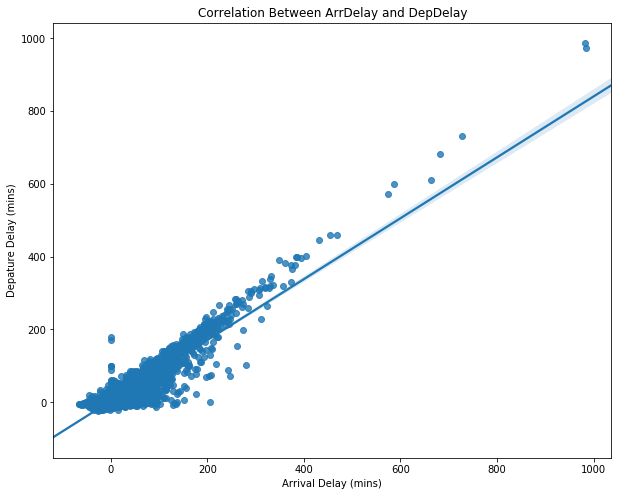

In [6]:
plt.figure(figsize=(10,8))
ArrDep = f_data[['ArrDelay', 'DepDelay']]
# cutting out outlies from DepDelay
ArrDep = ArrDep[ArrDep['DepDelay'] < 1200]
sb.regplot(data = ArrDep, x = 'ArrDelay', y = 'DepDelay').set_title('Correlation Between ArrDelay and DepDelay')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Depature Delay (mins)');

## Monthly distribution of Arrival Delay and Departure Delay
> Both Arrival and Departure delays have a similar pattern. It shows very low value count of delays in February and high value count in August. It then shows that its better to travel during the month of February.

In [7]:
#Defining functions fro plotting Lineplots and scatter plots
def plot(data,cols,kind,figprams, labels,title):
    #sb.set_style('darkgrid')
    data.plot(x=cols[0], y=cols[1], kind=kind, figsize=(figprams[0],figprams[1]))
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)
    plt.show()

In [8]:
#Defining function for data aggregation
def aggregatedData(dataFrame,xCol,yCol):
    years = dataFrame[xCol].unique()
    countByYear = []
    for year in years:
        year_df = dataFrame[dataFrame[xCol]==year] 
        count = len(year_df.index) 
        countByYear.append((year, count))
    countByYearDF = pd.DataFrame(countByYear, columns=[xCol,yCol]).sort_values(xCol).reset_index().drop(['index'], axis=1)
    return countByYearDF

In [9]:
#Defining function for creating subplots
    
def subplotsDiffData(data1,data2,kinds,plot1labels,plot2labels,titles):
    #Subplots for 
    fig = plt.figure() # create figure
    ax0 = fig.add_subplot(1, 2, 1) 
    ax1 = fig.add_subplot(1, 2, 2) 
    # Subplot 1: Box plot
    data1.plot(x=plot1labels[0], y=plot1labels[1],kind=kinds[0], figsize=(20, 6), ax=ax0) # add to subplot 1
    ax0.set_title(titles[0])
    ax0.set_xlabel(plot1labels[0])
    ax0.set_ylabel(plot1labels[1])
    # Subplot 2: Line plot
    data2.plot(x=plot2labels[0], y=plot2labels[1],kind=kinds[1], figsize=(20, 6), ax=ax1) # add to subplot 2
    ax1.set_title (titles[1])
    ax1.set_xlabel(plot2labels[0])
    ax1.set_ylabel(plot2labels[1])
    plt.show()

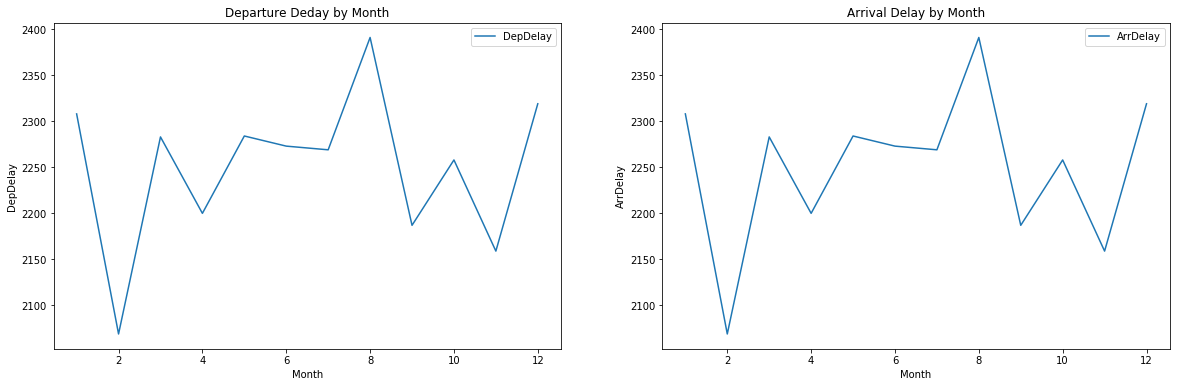

In [10]:
month_arr = aggregatedData(f_data,'Month','DepDelay')
month_dep = aggregatedData(f_data,'Month','ArrDelay')
subplotsDiffData(month_arr,month_dep,['line','line'],['Month','DepDelay'],['Month','ArrDelay'],['Departure Deday by Month','Arrival Delay by Month']);

### Checking which delay was popular over the years. 
Depature Delay had always been dominant over these years, followed by Arrival Delay only a few times when it interchanged with LateAirCraft Delay.

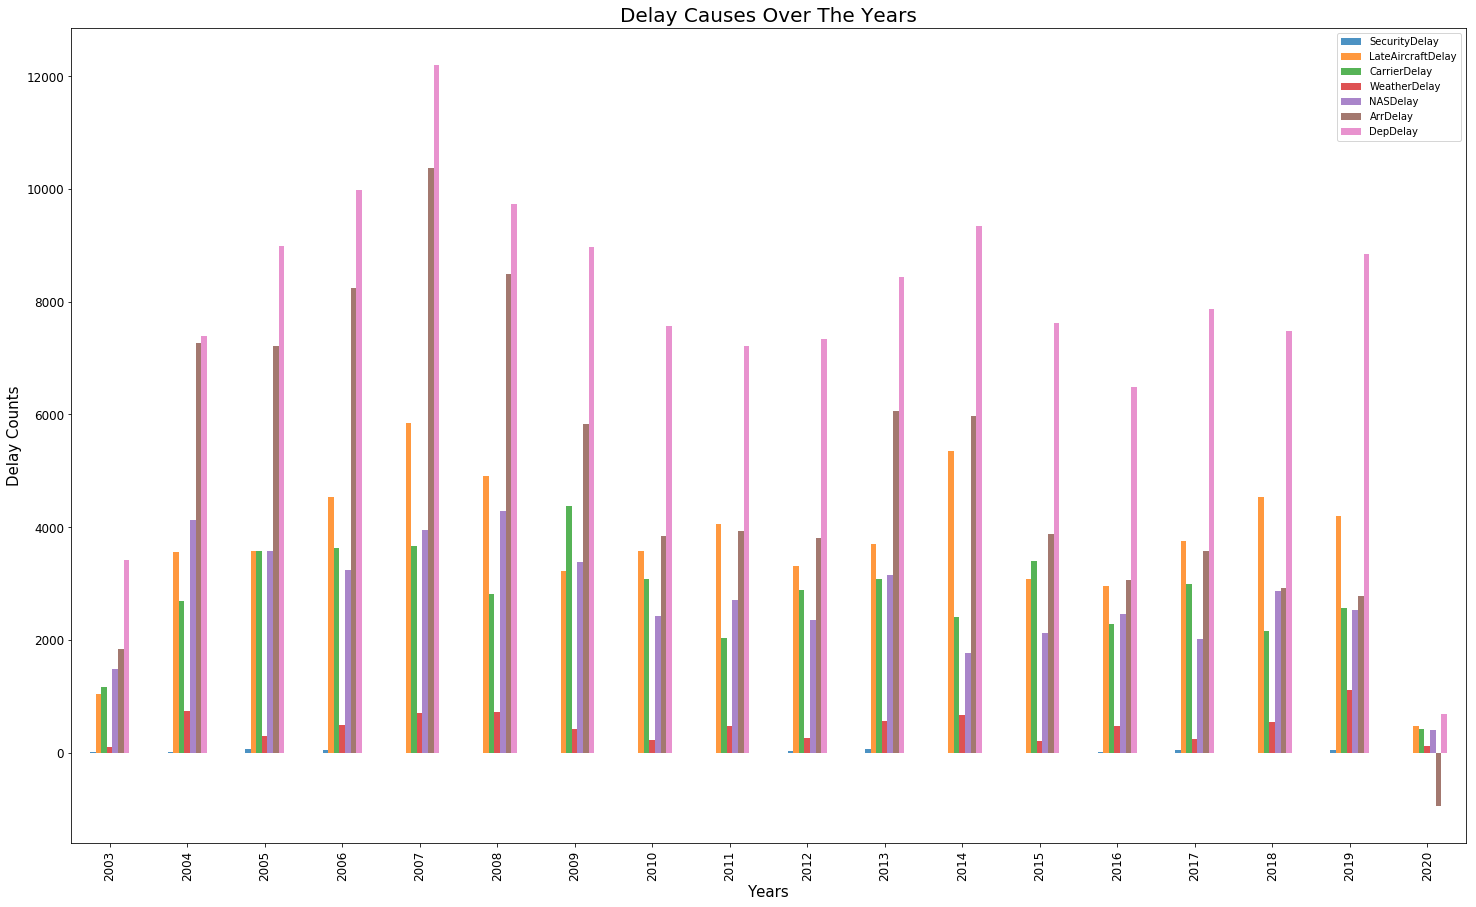

In [11]:
delaysDF = f_data.filter(['Year','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay', 'ArrDelay', 'DepDelay'], axis=1)
delaysDF = delaysDF.groupby('Year')['SecurityDelay','LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay', 'ArrDelay', 'DepDelay'].sum()
ax = delaysDF.loc[2003:].plot(kind='bar',alpha=0.8, figsize=(25,15 ))
ax.set_title('Delay Causes Over The Years',fontsize = 20)
ax.set_ylabel('Delay Counts', fontsize = 15)
ax.set_xlabel('Years', fontsize = 15)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
sb.color_palette('colorblind');

### Yearly flight cancellations
In most of the years Weather(B) had been causing flight cancellations most. Security(D) was never an issue until 2020 where it has the highest figure and it might have been triggered by corona virus.

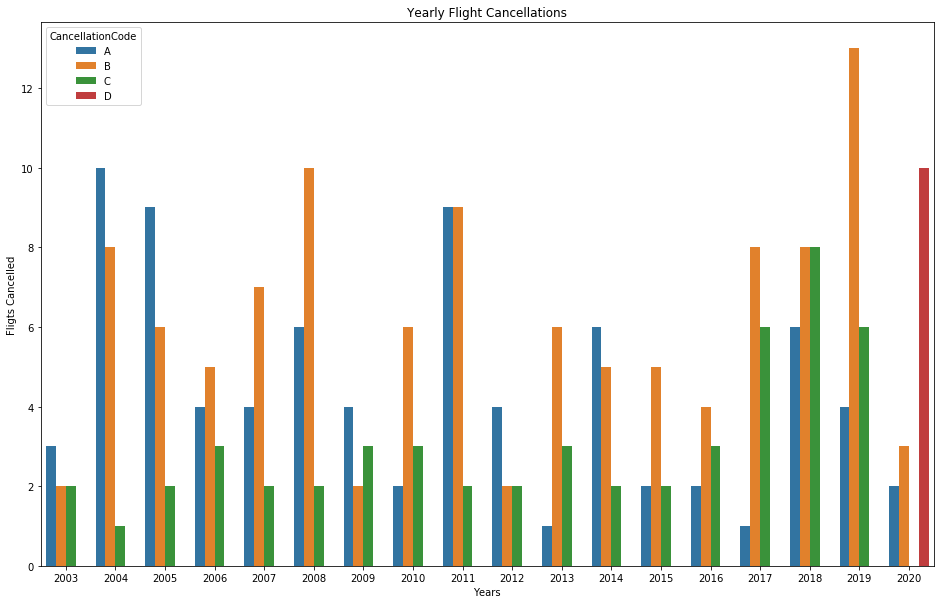

In [12]:
plt.figure(figsize = [16, 10])
bar_data = f_data.groupby(['Year','CancellationCode'])['Flights'].sum().reset_index()
sb.barplot(data=bar_data, x='Year',y='Flights',hue='CancellationCode').set_title('Yearly Flight Cancellations',fontsize = 12)
plt.ylabel('Fligts Cancelled')
plt.xlabel('Years')
sb.color_palette('colorblind');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 446642 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
